## 1. Load the dataset

In [ ]:
# import neccessary librabries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# load the dataset
ldf = pd.read_csv('Loan_default_project.csv')

ldf.head(10) #load the first 10 rows

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
5,A9S62RQ7US,25,90298,90448,720,18,2,22.72,24,0.10,High School,Unemployed,Single,Yes,No,Business,Yes,1
6,H8GXPAOS71,38,111188,177025,429,80,1,19.11,12,0.16,Bachelor's,Unemployed,Single,Yes,No,Home,Yes,0
7,0HGZQKJ36W,56,126802,155511,531,67,4,8.15,60,0.43,PhD,Full-time,Married,No,No,Home,Yes,0
8,1R0N3LGNRJ,36,42053,92357,827,83,1,23.94,48,0.20,Bachelor's,Self-employed,Divorced,Yes,No,Education,No,1
9,CM9L1GTT2P,40,132784,228510,480,114,4,9.09,48,0.33,High School,Self-employed,Married,Yes,No,Other,Yes,0


## 2. EDA

In [ ]:
# rows and columns count
ldf.shape

(255347, 18)

In [ ]:
# check data type
ldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [ ]:
# check for all missing values
print('All Missing Values per Column:')
print(ldf.isnull().sum())

All Missing Values per Column:
LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64


<Axes: >

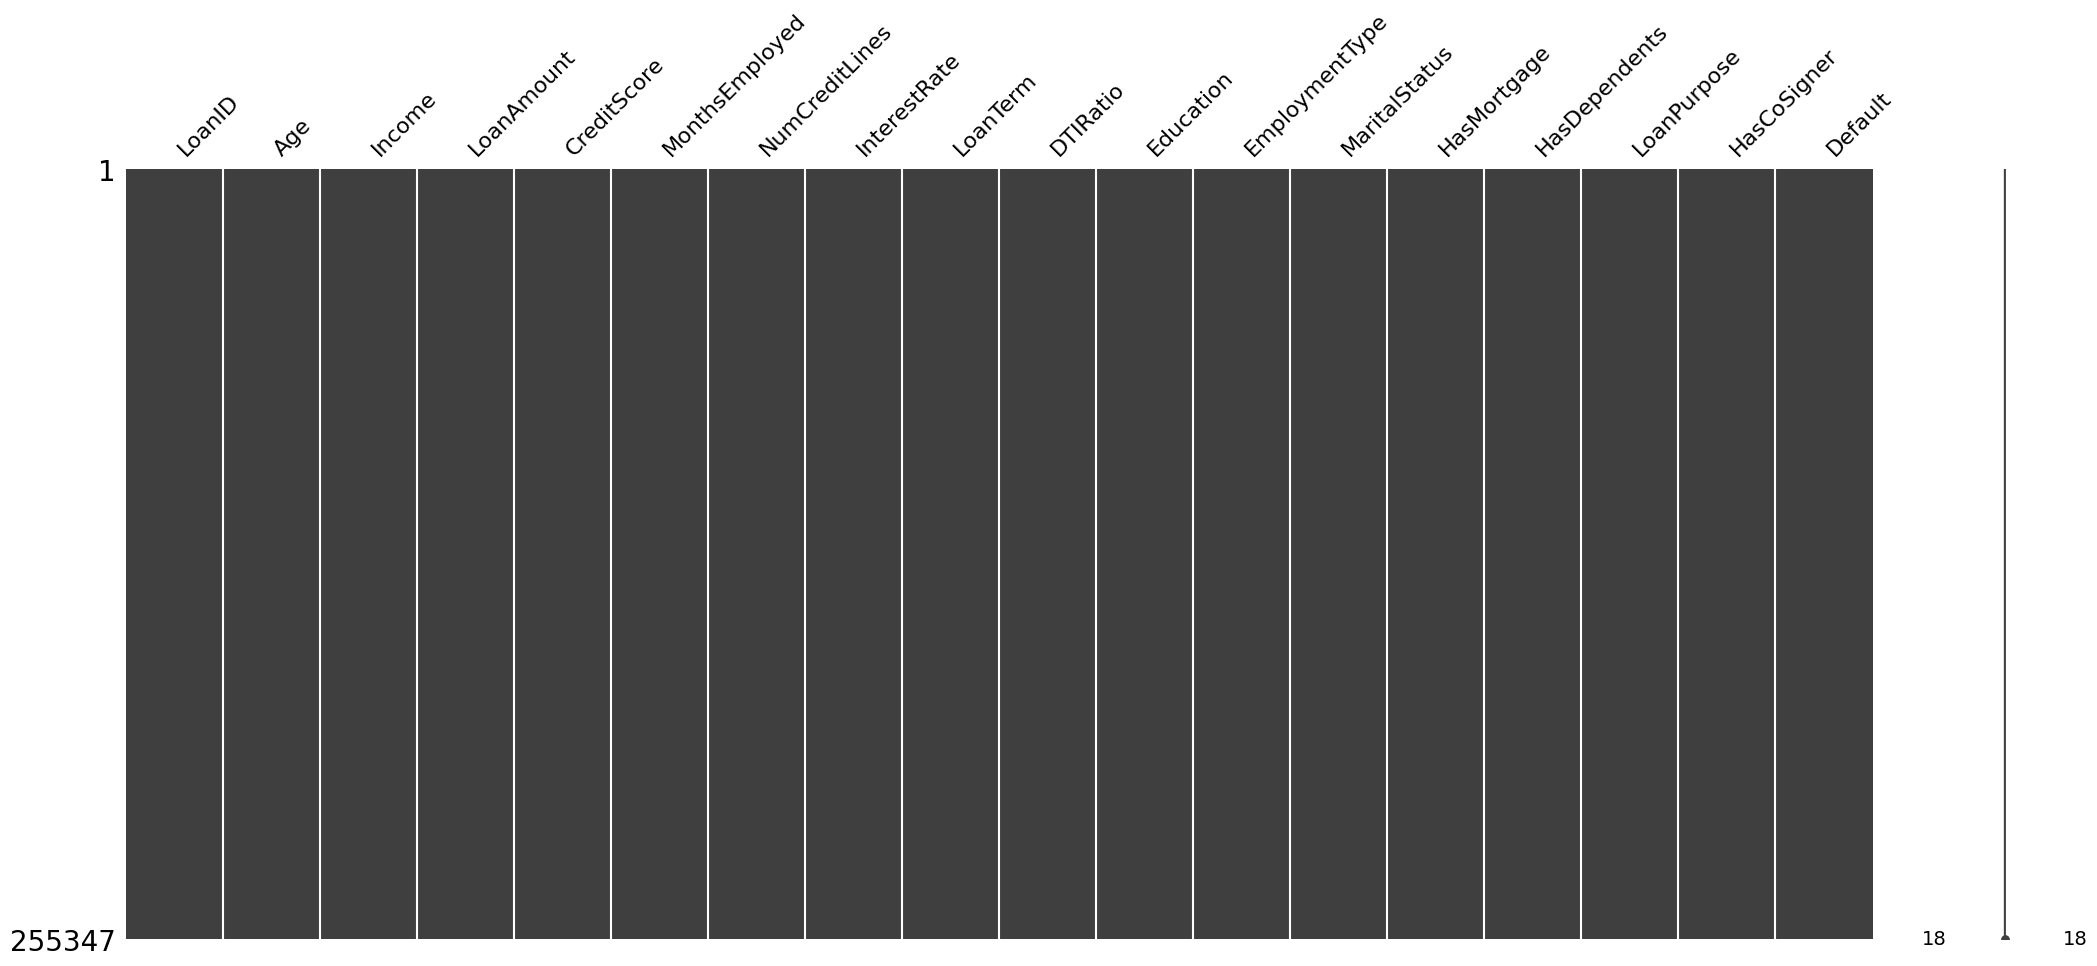

In [ ]:
# visualize missingness using missingno method
import missingno as msno
msno.matrix(ldf)

In [ ]:
# check on statistical info
ldf.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [ ]:
# duplicate check
ldf.duplicated().sum()

np.int64(0)

In [ ]:
# check for count per target value
ldf['Default'].value_counts()

,count
Default,
0,225694
1,29653


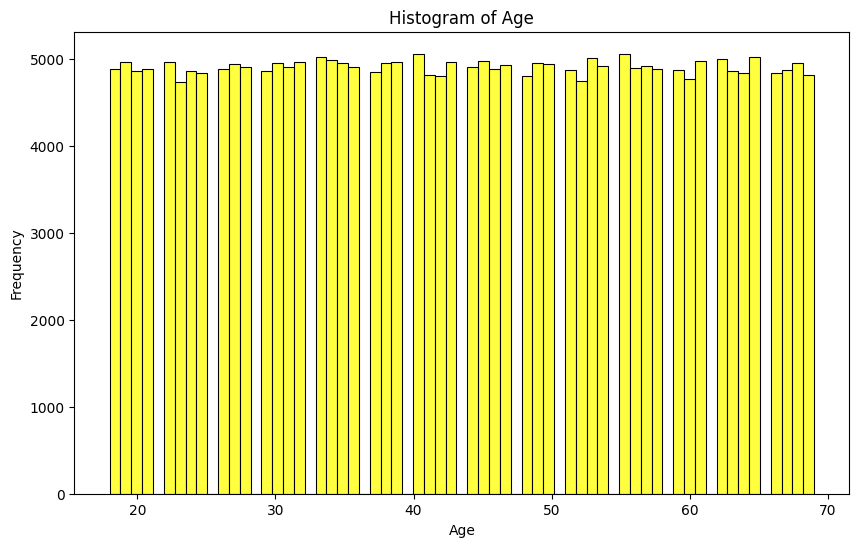

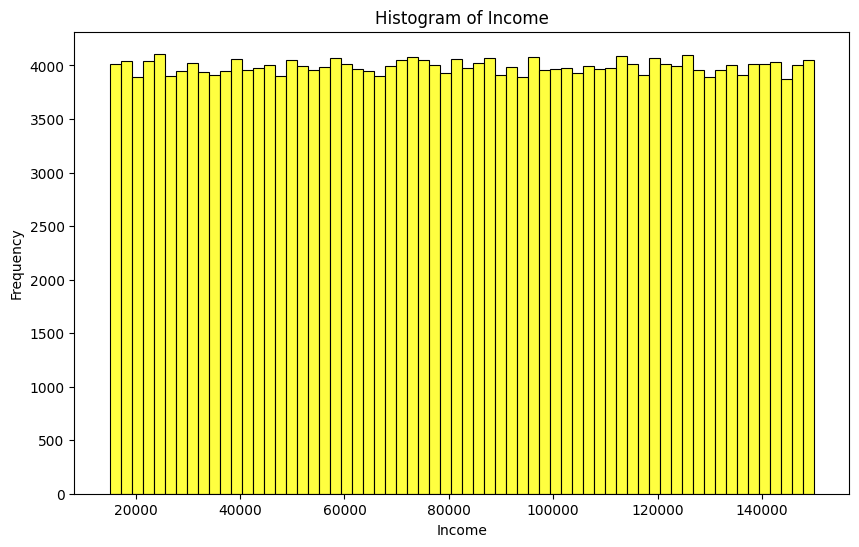

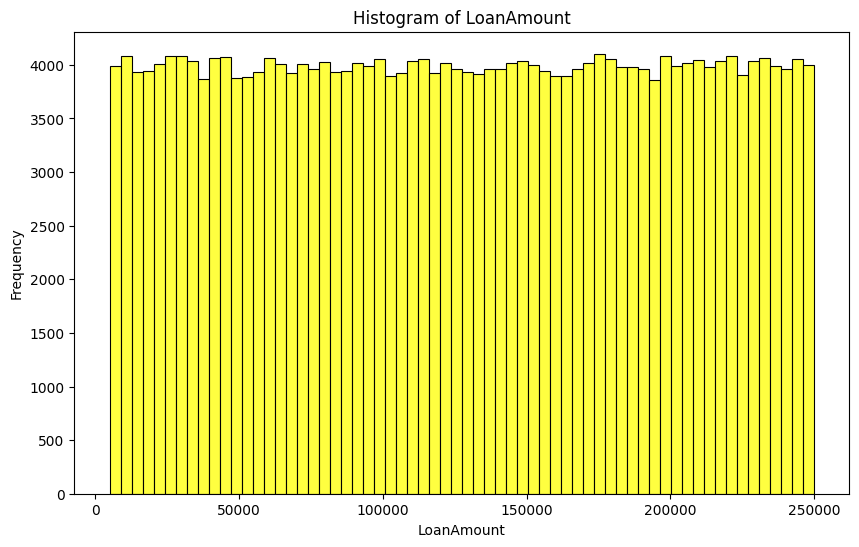

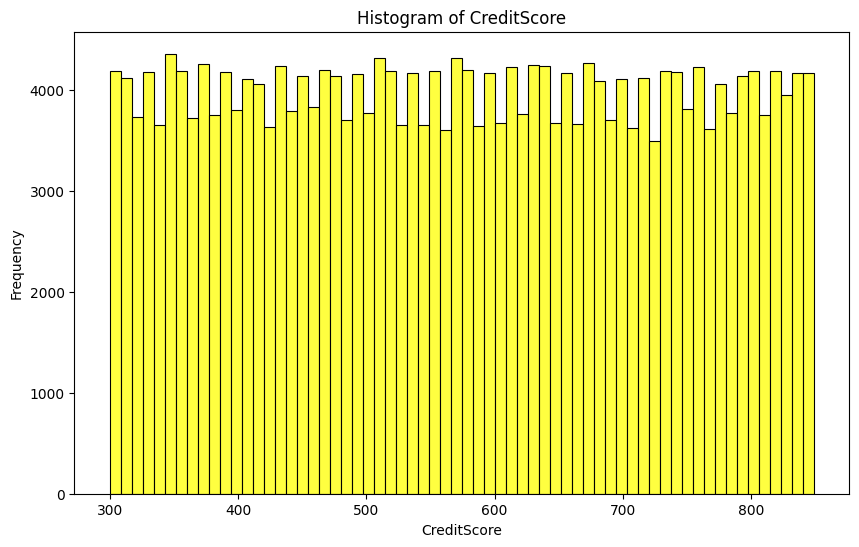

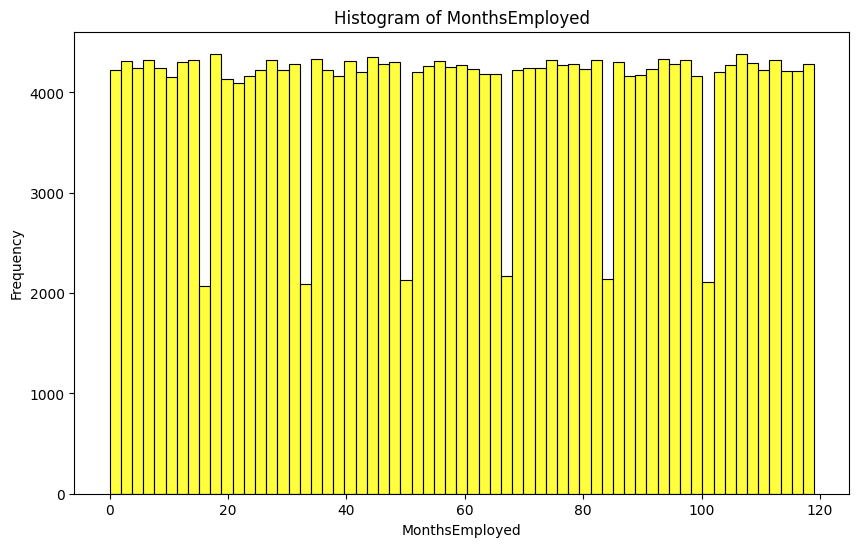

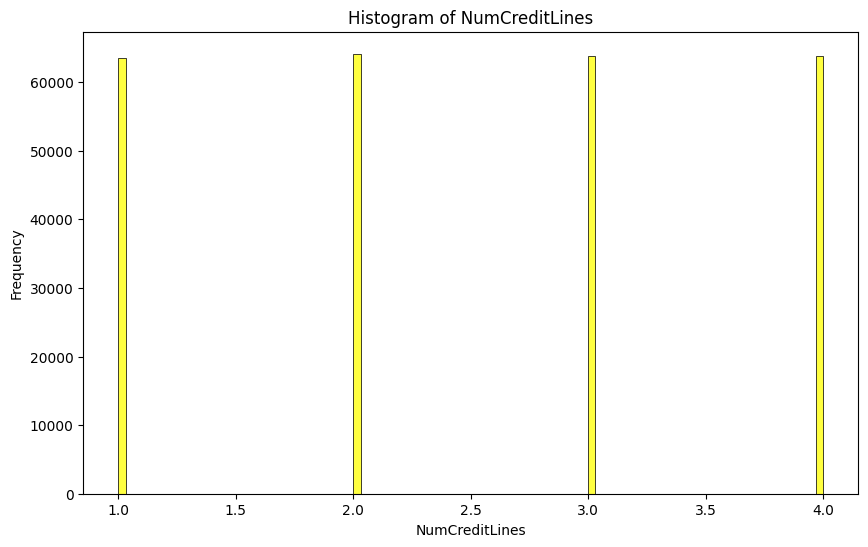

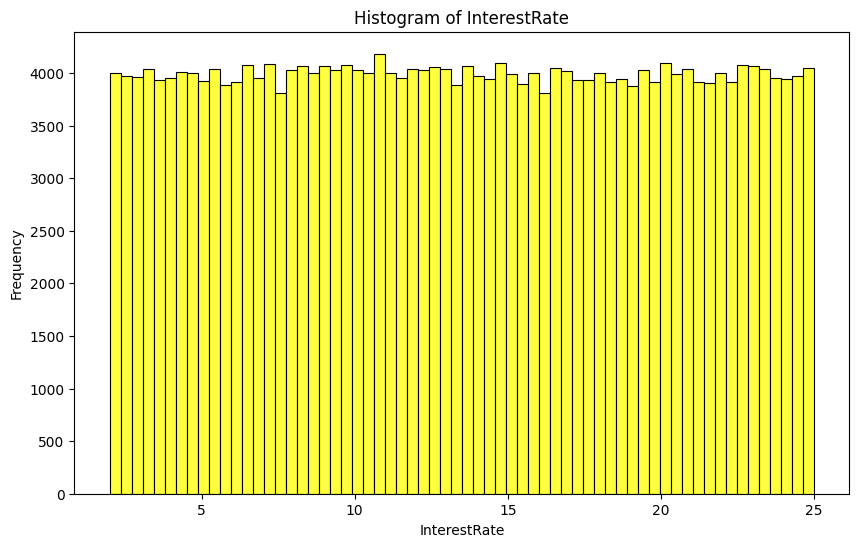

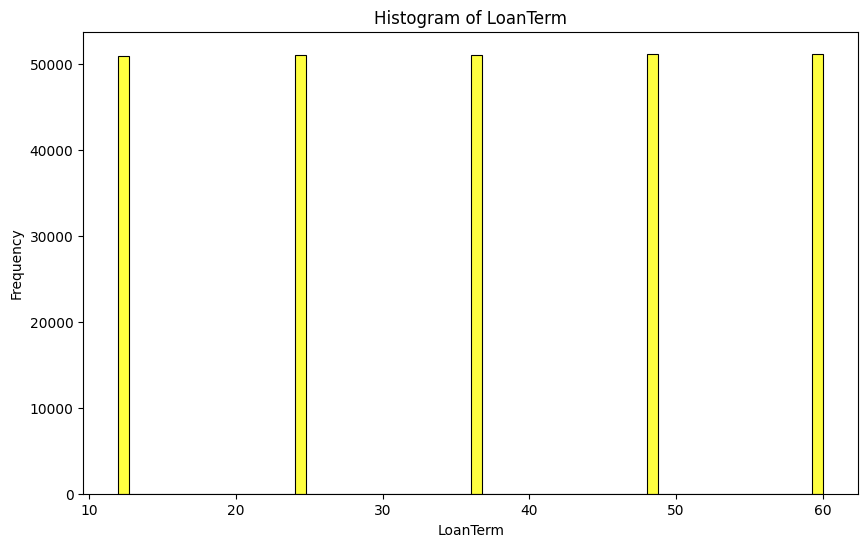

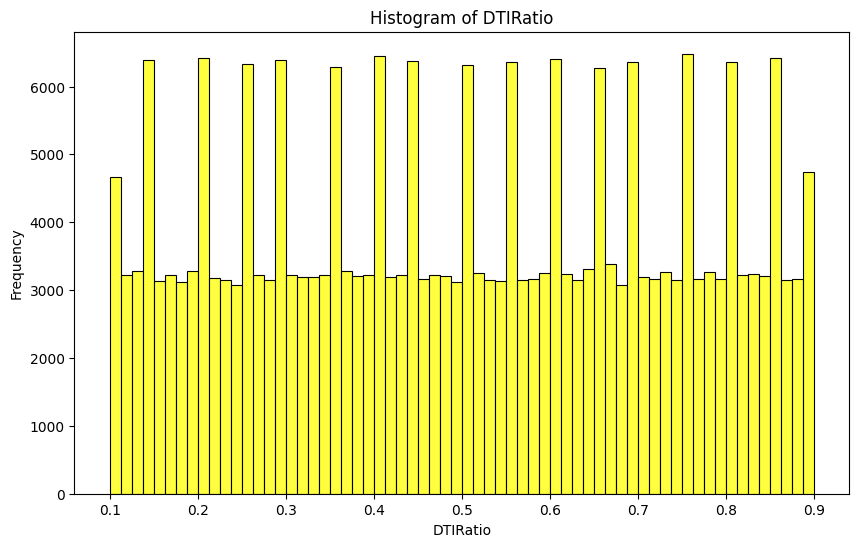

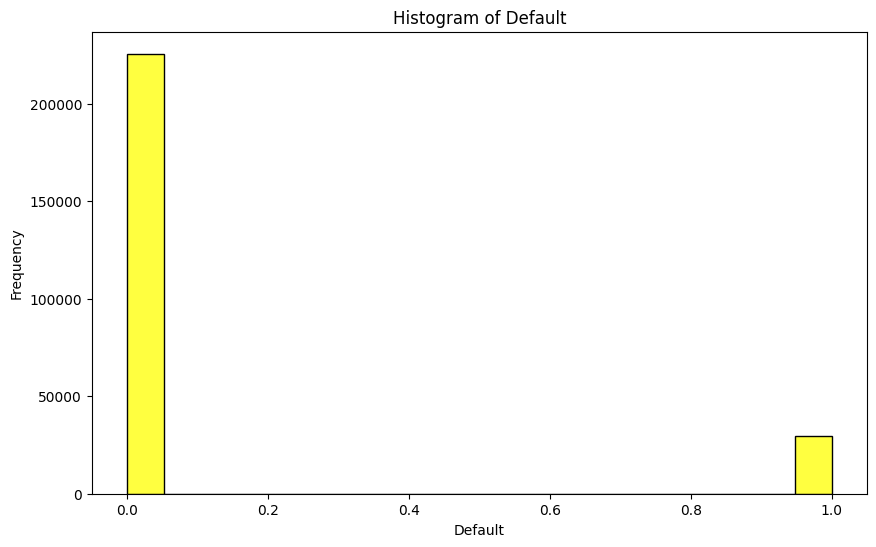

In [ ]:
# bar graph visualization of each feature
# Select only numeric columns for histogram
numeric_cols = ldf.select_dtypes(include=np.number).columns

# Create histograms for each numeric feature
for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(ldf[col], kde=False, color='yellow')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')
    plt.show()

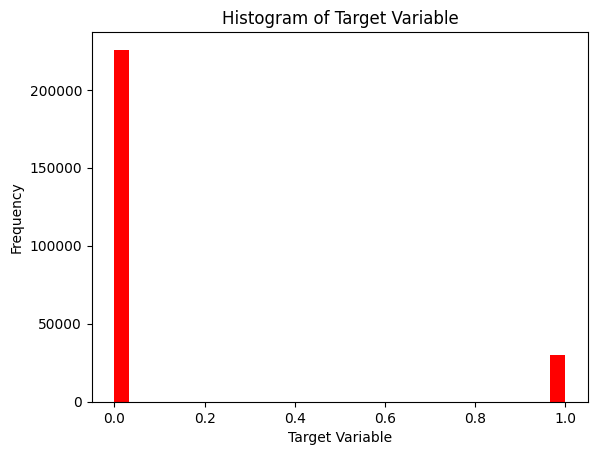

In [ ]:
# target variable visualize by histogram
target_var = ldf['Default'].dropna()

plt.figure()
plt.hist(target_var, bins=30, color='red')
plt.xlabel('Target Variable')
plt.ylabel('Frequency')
plt.title('Histogram of Target Variable')
plt.show()

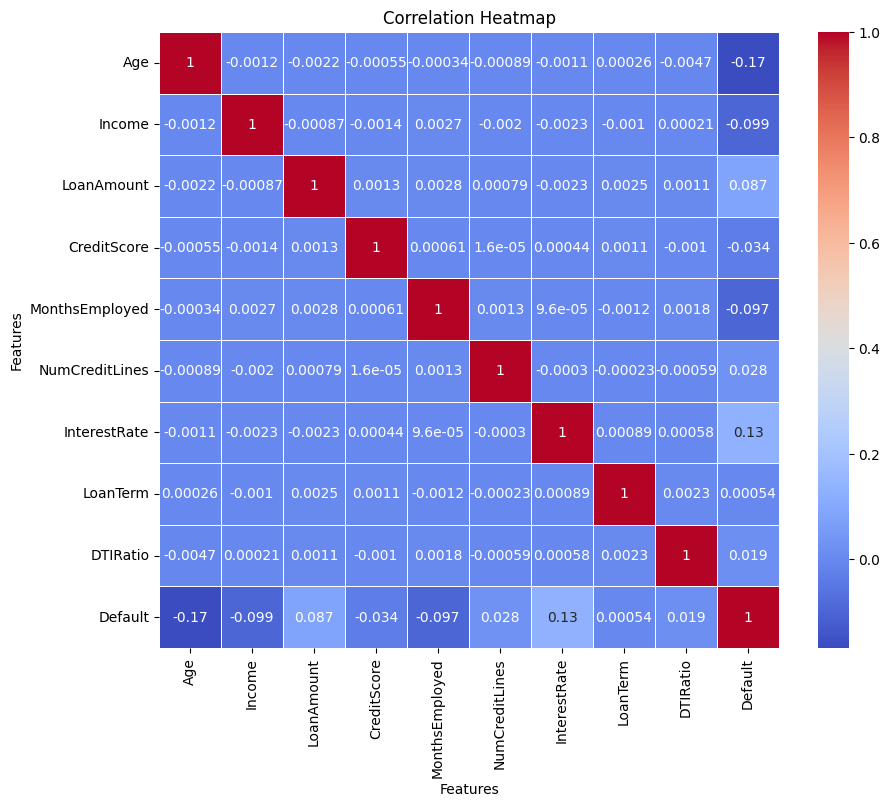

In [ ]:
# corelation heatmap
numeric_cols = ldf.select_dtypes(include=[np.number]).columns
corr_matrix = ldf[numeric_cols].corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

## 3. Train-test-split

In [ ]:
# import neccessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Spliting data target and feature variables
ldf = ldf.dropna(subset=['Default'])
x = ldf.drop('Default', axis=1)
y = ldf['Default']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("Training set shape:", x_train.shape, y_train.shape)
print("Testing set shape:", x_test.shape, y_test.shape)

print('\nTrain class distribution:')
print(y_train.value_counts())
print('\nTest class distribution:')
print(y_test.value_counts())

Training set shape: (204277, 17) (204277,)
Testing set shape: (51070, 17) (51070,)

Train class distribution:
Default
0    180524
1     23753
Name: count, dtype: int64

Test class distribution:
Default
0    45170
1     5900
Name: count, dtype: int64


## 4. Preprocessing

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

num_cols = x_train.select_dtypes(include=["number", "bool"]).columns.tolist()
cat_cols = x_train.select_dtypes(exclude=["number", "bool"]).columns.tolist()

num_pipe = Pipeline([("imp", SimpleImputer(strategy="median")),
                     ("sc", StandardScaler())])
cat_pipe = Pipeline([("imp", SimpleImputer(strategy="most_frequent")),
                     ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False))])

prep = ColumnTransformer([("num", num_pipe, num_cols),
                          ("cat", cat_pipe, cat_cols)])

## 5. Baseline model

In [ ]:
# Import neccessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

LOGISTIC MODEL

In [ ]:
# Logistci model
logistic_model = LogisticRegression(random_state=42)

# Drop the 'LoanID' column as it's not useful for modeling
x_train_processed = x_train.drop('LoanID', axis=1)
x_test_processed = x_test.drop('LoanID', axis=1)

# Identify categorical columns (excluding 'LoanID' which was dropped)
categorical_cols = x_train_processed.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
x_train_encoded = pd.get_dummies(x_train_processed, columns=categorical_cols, drop_first=True)
x_test_encoded = pd.get_dummies(x_test_processed, columns=categorical_cols, drop_first=True)

# Align columns - crucial for consistent feature sets between train and test after encoding
train_cols = x_train_encoded.columns
test_cols = x_test_encoded.columns

missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    x_test_encoded[c] = 0

missing_in_train = set(test_cols) - set(train_cols)
for c in missing_in_train:
    x_train_encoded[c] = 0

x_test_encoded = x_test_encoded[train_cols]
logistic_model.fit(x_train_encoded, y_train)
logistic_pred = logistic_model.predict(x_test_encoded)

# classification report
logistic_accuracy = accuracy_score(y_test, logistic_pred)
print("Logistic Regression Accuracy:", logistic_accuracy)
print(classification_report(y_test, logistic_pred))

Logistic Regression Accuracy: 0.8849422361464656
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.64      0.01      0.02      5900

    accuracy                           0.88     51070
   macro avg       0.76      0.50      0.48     51070
weighted avg       0.86      0.88      0.83     51070



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix:
[[45140    30]
 [ 5846    54]]


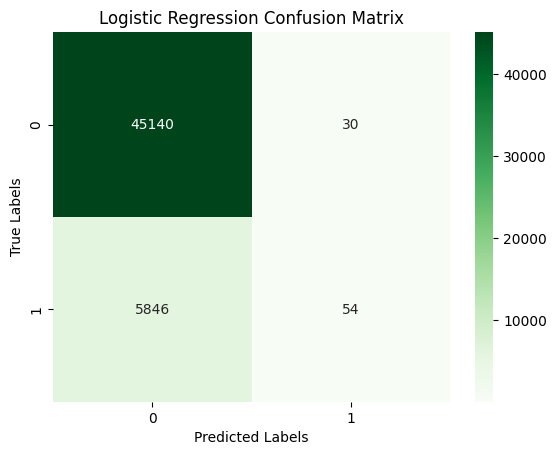

In [ ]:
# confusion matrix
Log_cm = confusion_matrix(y_test, logistic_pred)
print("Confusion Matrix:")
print(Log_cm)

# visualize logistic model using heatmap
sns.heatmap(Log_cm, annot=True, fmt='d', cmap='Greens')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

RANDOM FOREST

In [ ]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train_encoded, y_train)
rf_pred = rf_model.predict(x_test_encoded)

# classification report
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)
print(classification_report(y_test, rf_pred))

Random Forest Accuracy: 0.8861954180536519
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.67      0.03      0.06      5900

    accuracy                           0.89     51070
   macro avg       0.78      0.51      0.50     51070
weighted avg       0.86      0.89      0.84     51070



Confusion Matrix:
[[45084    86]
 [ 5726   174]]


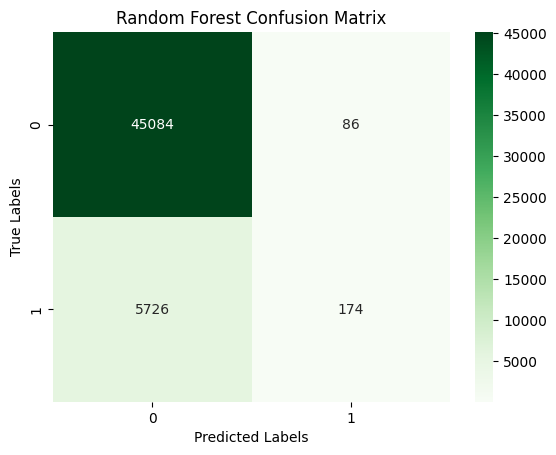

In [ ]:
# confusion matrix of random forest
rf_cm = confusion_matrix(y_test, rf_pred)
print("Confusion Matrix:")
print(rf_cm)

# visualize random forest model using heatmap
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Greens')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

GRADIENT BOOSTING

In [ ]:
# Gradient Boosting
gb_model = XGBClassifier(random_state=42)
gb_model.fit(x_train_encoded, y_train)
gb_pred = gb_model.predict(x_test_encoded)

# classification report
gb_accuracy = accuracy_score(y_test, gb_pred)
print("Gradient Boosting Accuracy:", gb_accuracy)
print(classification_report(y_test, gb_pred))

Gradient Boosting Accuracy: 0.8863912277266497
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     45170
           1       0.55      0.09      0.15      5900

    accuracy                           0.89     51070
   macro avg       0.72      0.54      0.54     51070
weighted avg       0.85      0.89      0.85     51070



Confusion Matrix:
[[44756   414]
 [ 5388   512]]


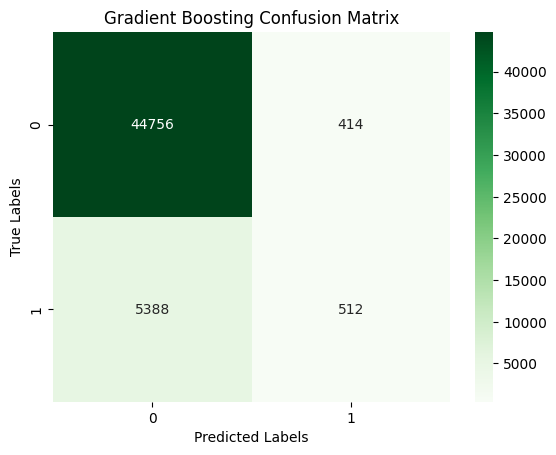

In [ ]:
# confusion matrix
gb_cm = confusion_matrix(y_test, gb_pred)
print("Confusion Matrix:")
print(gb_cm)

# visualize gradient boosting model using heatmap
sns.heatmap(gb_cm, annot=True, fmt='d', cmap='Greens')
plt.title('Gradient Boosting Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 6. Feature Engineering


In [ ]:
# Correct column names for feature engineering
def add_features(df_):
    df_ = df_.copy()
    # Check if the correct column names exist before creating the new feature
    if {"LoanAmount", "Income"} <= set(df_.columns):
        df_["loan_to_income"] = df_["LoanAmount"] / (df_["Income"] + 1e-6)
    return df_

# Apply feature engineering to the training and testing sets
x_train_fe = add_features(x_train)
x_test_fe = add_features(x_test)

# Update num_cols and cat_cols based on the new dataframes with the engineered feature
num_cols_fe = x_train_fe.select_dtypes(include=["number", "bool"]).columns.tolist()
cat_cols_fe = x_train_fe.select_dtypes(exclude=["number", "bool"]).columns.tolist()

# display the head of the new dataframes to show the added feature
print("x_train_fe head:")
display(x_train_fe.head())
print("\nx_test_fe head:")
display(x_test_fe.head())

x_train_fe head:


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,loan_to_income
137187,DRIRC89L0T,18,137576,209136,846,26,2,10.47,60,0.81,High School,Self-employed,Single,Yes,No,Business,No,1.520149
230334,TS0FIUNHNU,47,57194,5970,748,30,2,19.72,36,0.73,High School,Unemployed,Divorced,No,Yes,Education,No,0.104382
19687,I0YR284A1V,26,84328,95065,453,7,2,24.25,12,0.45,Master's,Self-employed,Married,No,No,Other,Yes,1.127324
106509,WB1T7NQV8A,53,49795,229582,533,107,3,14.44,60,0.17,Bachelor's,Self-employed,Single,Yes,No,Auto,Yes,4.610543
242291,J6GU9M4G1Z,49,115450,22072,840,0,4,24.48,12,0.11,Bachelor's,Part-time,Single,No,Yes,Education,Yes,0.191182



x_test_fe head:


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,loan_to_income
51139,CKV34LU7V7,55,112656,92393,581,113,2,23.54,36,0.15,PhD,Self-employed,Single,Yes,Yes,Home,No,0.820134
71005,62KTYNH93J,56,91569,131575,641,54,1,15.19,12,0.43,High School,Part-time,Divorced,Yes,Yes,Education,Yes,1.436895
35684,JGFUSOIUH7,26,78169,75417,569,105,3,18.02,12,0.29,Master's,Part-time,Married,Yes,Yes,Education,Yes,0.964794
174087,4538THBHOX,26,63033,10804,326,118,1,14.71,24,0.41,High School,Part-time,Single,No,No,Business,Yes,0.171402
137952,DXLNA06JHR,24,29665,21182,662,102,3,15.02,60,0.69,PhD,Unemployed,Single,No,Yes,Business,Yes,0.714040


## ---------- Preprocessing -----------

In [ ]:
# import libraries for class imbalance and oversampling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE, SMOTENC, RandomOverSampler
from imblearn.pipeline import Pipeline
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

## 5. Class Imbalance Handling (SMOTE)

In [ ]:
num_cols = x_train.select_dtypes(include=["number","bool"]).columns.tolist()
cat_cols = x_train.select_dtypes(exclude=["number","bool"]).columns.tolist()

num_pipe = Pipeline([
    ("imp", SimpleImputer(strategy="median")),
    ("sc", StandardScaler())
])

# IMPORTANT: keep OHE sparse + collapse rare categories
cat_pipe = Pipeline([
    ("imp", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(
        handle_unknown="ignore",
        min_frequency=0.01,     # group infrequent levels as 'other' (~1%)
    ))
])

prep = ColumnTransformer([
    ("num", num_pipe, num_cols),
    ("cat", cat_pipe, cat_cols),
], sparse_threshold=0.3)  # keep overall output sparse

clf = LogisticRegression(max_iter=2000, class_weight="balanced", n_jobs=-1)

# Define a seed for reproducibility
SEED = 42

pipe = ImbPipeline([
    ("prep", prep),
    # LIGHTER SMOTE: don't fully balance; fewer neighbors
    ("smote", SMOTE(sampling_strategy=0.3, k_neighbors=3, random_state=SEED)),
    ("clf", clf)
])

pipe.fit(x_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('sc',
                                                                   StandardScaler())]),
                                                  ['Age', 'Income',
                                                   'LoanAmount', 'CreditScore',
                                                   'MonthsEmployed',
                                                   'NumCreditLines',
                                                   'InterestRate', 'LoanTerm',
                                                   'DTIRatio']),
                                                 ('cat',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 min_frequency=0.01))]),
                                                  ['LoanID', 'Education',
                                                   'EmploymentType',
                                                   'MaritalStatus',
                                                   'HasMortgage',
                                                   'HasDependents',
                                                   'LoanPurpose',
                                                   'HasCoSigner'])])),
                ('smote',
                 SMOTE(k_neighbors=3, random_state=42, sampling_strategy=0.3)),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=2000,
                                    n_jobs=-1))])

LOGISTIC REGRESSION

In [ ]:
# Logistic Regression with SMOTE
pip_logistic = ImbPipeline([
    ("prep", prep),
    ("smote", SMOTE(sampling_strategy=0.3, k_neighbors=3, random_state=SEED)),
    ("clf", LogisticRegression(max_iter=2000, class_weight="balanced", n_jobs=-1))
])

pip_logistic.fit(x_train, y_train)

# Evaluate the model
y_pred = pip_logistic.predict(x_test)

print("Logistic-SMOTE Classification Report:")
print(classification_report(y_test, y_pred))

Logistic-SMOTE Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.65      0.77     45170
           1       0.21      0.72      0.33      5900

    accuracy                           0.66     51070
   macro avg       0.58      0.68      0.55     51070
weighted avg       0.86      0.66      0.72     51070



Log-SMOTE Confusion Matrix:
[[44721   449]
 [ 5397   503]]


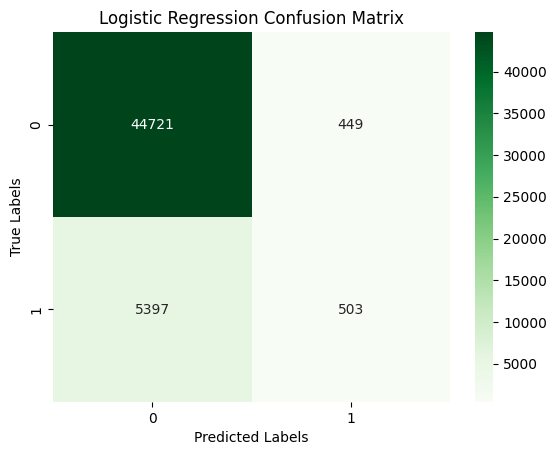

In [ ]:
# confusion matrix with SMOTE
log_cm_smote = confusion_matrix(y_test, y_pred)
print("Log-SMOTE Confusion Matrix:")
print(log_cm_smote)

# visualize logistic model using heatmap
sns.heatmap(log_cm_smote, annot=True, fmt='d', cmap='Greens')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

RANDOM FOREST

In [ ]:
# Random Forest with SMOTE
pip_rf = ImbPipeline([
    ("prep", prep),
    ("smote", SMOTE(sampling_strategy=0.3, k_neighbors=3, random_state=SEED)),
    ("clf", RandomForestClassifier(random_state=SEED, class_weight="balanced", n_jobs=-1))
])

pip_rf.fit(x_train, y_train)

# Evaluate the model
y_pred = pip_rf.predict(x_test)

print("Random Forest-SMOTE Classification Report:")
print(classification_report(y_test, y_pred))

Random Forest-SMOTE Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.59      0.05      0.10      5900

    accuracy                           0.89     51070
   macro avg       0.74      0.52      0.52     51070
weighted avg       0.85      0.89      0.84     51070



RF-SMOTE Confusion Matrix:
[[44721   449]
 [ 5397   503]]


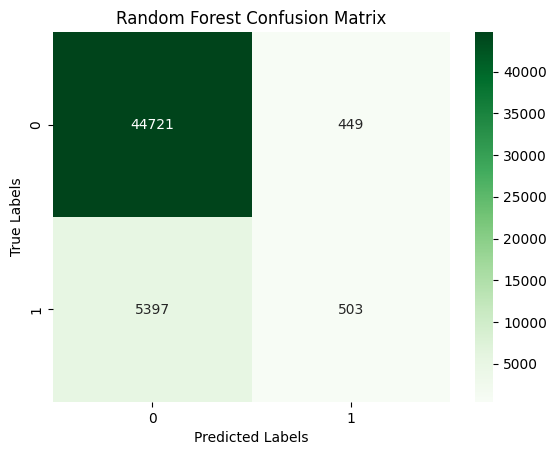

In [ ]:
# confusion matrix with SMOTE
rf_cm_smote = confusion_matrix(y_test, y_pred)
print("RF-SMOTE Confusion Matrix:")
print(rf_cm_smote)

# Visuaiiza by heatmap
sns.heatmap(rf_cm_smote, annot=True, fmt='d', cmap='Greens')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

GRADIENT BOOSTING

In [ ]:
# Gradient Boosting with SMOTE
pip_gb = ImbPipeline([
    ("prep", prep),
    ("smote", SMOTE(sampling_strategy=0.3, k_neighbors=3, random_state=SEED)),
    ("clf", XGBClassifier(random_state=SEED, class_weight="balanced", n_jobs=-1))
])

pip_gb.fit(x_train, y_train)

# Evaluate the model
y_pred = pip_gb.predict(x_test)

print("Gradient Boosting-SMOTE Classification Report:")
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [02:15:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "class_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Gradient Boosting-SMOTE Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     45170
           1       0.53      0.09      0.15      5900

    accuracy                           0.89     51070
   macro avg       0.71      0.54      0.54     51070
weighted avg       0.85      0.89      0.85     51070



GB-SMOTE Confusion Matrix:
[[44721   449]
 [ 5397   503]]


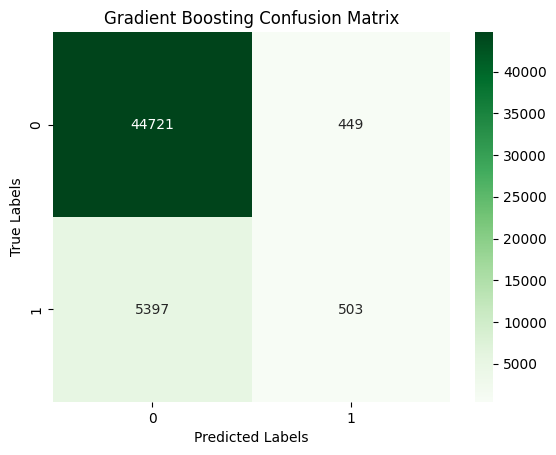

In [ ]:
# cofusion matrix with SMOTE
gb_cm_smote = confusion_matrix(y_test, y_pred)
print("GB-SMOTE Confusion Matrix:")
print(gb_cm_smote)

# Visualization after SMOTE
sns.heatmap(gb_cm_smote, annot=True, fmt='d', cmap='Greens')
plt.title('Gradient Boosting Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

COMPARE ALL MODELS

LogReg: F1=0.366 @ thr=0.655
RandomForest: F1=0.352 @ thr=0.286
HistGB: F1=0.364 @ thr=0.247


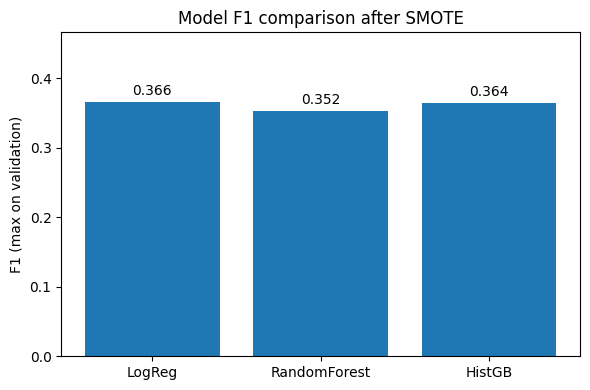

Best model: LogReg | F1: 0.36569714142798293 | thr: 0.6548019197917458


In [ ]:
# F1-score all models comparision visualization
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split

# Split training data into training and validation sets
x_train_fe, x_val_fe, y_train, y_val = train_test_split(x_train_fe, y_train, test_size=0.25, random_state=SEED)

models = {
    "LogReg": LogisticRegression(max_iter=2000, class_weight="balanced", n_jobs=-1),
    "RandomForest": RandomForestClassifier(n_estimators=500, random_state=SEED, n_jobs=-1),
    "HistGB": HistGradientBoostingClassifier(random_state=SEED)
}

def smote_pipeline(clf):
    return ImbPipeline([
        ("prep", prep),                    # ColumnTransformer
        ("smote", SMOTE(random_state=SEED)),
        ("clf", clf)
    ])

def best_f1_on_val(pipeline, X_tr, y_tr, X_va, y_va):
    pipeline.fit(X_tr, y_tr)
    # get probabilities for positive class
    proba = pipeline.predict_proba(X_va)[:, 1]
    prec, rec, thr = precision_recall_curve(y_va, proba)
    f1 = (2 * prec * rec) / (prec + rec + 1e-12)
    idx = np.nanargmax(f1)
    # precision_recall_curve returns thresholds len = len(prec)-1
    best_thr = thr[max(idx-1, 0)] if idx < len(thr) else 0.5
    y_hat = (proba >= best_thr).astype(int)
    return f1[idx], float(best_thr), pipeline

# run comparison
scores, thresholds, trained = {}, {}, {}
for name, clf in models.items():
    try:
        f1, thr, pipe = best_f1_on_val(smote_pipeline(clf), x_train_fe, y_train, x_val_fe, y_val)
        scores[name] = f1
        thresholds[name] = thr
        trained[name] = pipe
        print(f"{name}: F1={f1:.3f} @ thr={thr:.3f}")
    except Exception as e:
        print(f"{name}: skipped ({e})")

# visualize by histogram
names = list(scores.keys())
vals = [scores[n] for n in names]

plt.figure(figsize=(6,4))
plt.bar(names, vals)
plt.ylabel("F1 (max on validation)")
plt.title("Model F1 comparison after SMOTE")
for i, v in enumerate(vals):
    plt.text(i, v + 0.01, f"{v:.3f}", ha="center")
plt.ylim(0, max(vals)+0.1)
plt.tight_layout()
plt.show()

# Choose the best model
best_model_name = max(scores, key=scores.get)
print("Best model:", best_model_name, "| F1:", scores[best_model_name], "| thr:", thresholds[best_model_name])
best_model = trained[best_model_name]
best_thr = thresholds[best_model_name]

## 6. Hyperparameter Tuning (RandomizedSearchCV)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

param_rf = {
    "clf__n_estimators": [300, 500, 800],
    "clf__max_depth": [None, 10, 20, 30],
    "clf__min_samples_split": [2, 5, 10],
    "clf__min_samples_leaf": [1, 2, 4],
    "clf__max_features": ["sqrt", "log2", None],
}

search = RandomizedSearchCV(
    pip_rf, param_distributions=param_rf, n_iter=15, scoring="average_precision",
    cv=cv, n_jobs=-1, random_state=SEED, verbose=1
)
search.fit(x_train_fe, y_train)
best_model = search.best_estimator_
print("best PR-AUC (cv):", search.best_score_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


best PR-AUC (cv): 0.2957187927672576


## 7. Threhold selection on validation

chosen threshold: 0.34614777846103695


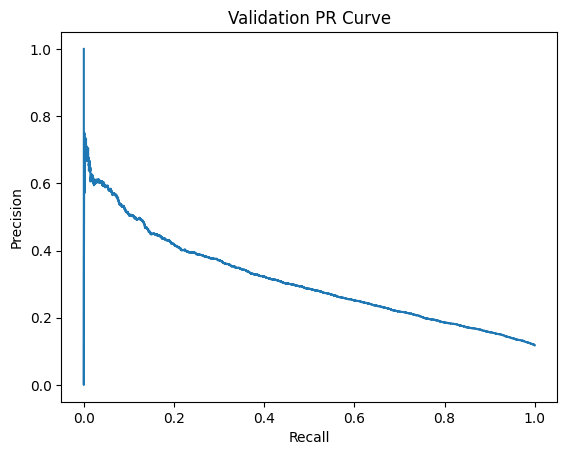

In [ ]:
# choose threshold by max F1 on validation
val_proba = best_model.predict_proba(x_val_fe)[:, 1]
prec, rec, thr = precision_recall_curve(y_val, val_proba)
f1 = (2*prec*rec)/(prec+rec+1e-12)
best_idx = np.nanargmax(f1)
best_thr = thr[max(best_idx-1, 0)] if best_idx < len(thr) else 0.5
print("chosen threshold:", best_thr)

# quick plots
plt.plot(rec, prec); plt.xlabel("Recall"); plt.ylabel("Precision"); plt.title("Validation PR Curve"); plt.show()

Evaluation of the best model (LogReg) on the test set with threshold 0.346:
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.84      0.88     45170
           1       0.29      0.48      0.36      5900

    accuracy                           0.80     51070
   macro avg       0.61      0.66      0.62     51070
weighted avg       0.85      0.80      0.82     51070


Confusion Matrix:
[[38131  7039]
 [ 3087  2813]]


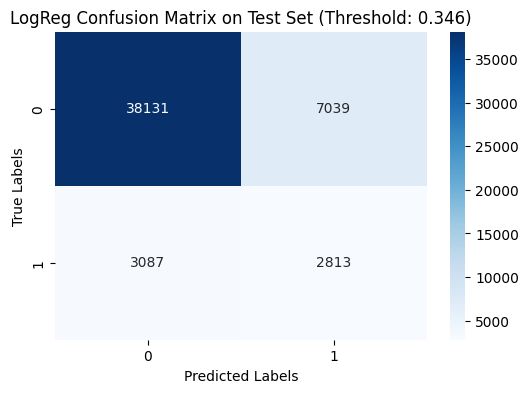

In [ ]:
# Evaluate the best model on the test set with the chosen threshold
y_test_pred_proba = best_model.predict_proba(x_test_fe)[:, 1]
y_test_pred = (y_test_pred_proba >= best_thr).astype(int)

print(f"Evaluation of the best model ({best_model_name}) on the test set with threshold {best_thr:.3f}:")
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

# Visualize the confusion matrix
test_cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'{best_model_name} Confusion Matrix on Test Set (Threshold: {best_thr:.3f})')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## 8. Test Evaluation (fianl fit/ train+val)

In [ ]:
from sklearn.metrics import roc_auc_score, average_precision_score, confusion_matrix, classification_report
import pandas as pd

x_trval_fe = pd.concat([x_train_fe, x_val_fe], axis=0)
y_trval = pd.concat([y_train, y_val], axis=0)

final_model = best_model
final_model.fit(x_trval_fe, y_trval)

test_proba = final_model.predict_proba(x_test_fe)[:, 1]
test_pred = (test_proba >= best_thr).astype(int)

print("ROC-AUC:", roc_auc_score(y_test, test_proba))
print("PR-AUC :", average_precision_score(y_test, test_proba))
print(confusion_matrix(y_test, test_pred))
print(classification_report(y_test, test_pred, digits=3))

ROC-AUC: 0.7500157634248019
PR-AUC : 0.3141030211028875
[[37940  7230]
 [ 3025  2875]]
              precision    recall  f1-score   support

           0      0.926     0.840     0.881     45170
           1      0.285     0.487     0.359      5900

    accuracy                          0.799     51070
   macro avg      0.605     0.664     0.620     51070
weighted avg      0.852     0.799     0.821     51070



## 9. Explainability

In [ ]:
# permutation importance (model-agnostic, slow on large sets → sample)
from sklearn.inspection import permutation_importance
sample_idx = np.random.RandomState(SEED).choice(len(x_test_fe), size=min(5000, len(x_test_fe)), replace=False)

# Apply preprocessing to the sample of the test set
x_test_fe_processed = final_model.named_steps["prep"].transform(x_test_fe.iloc[sample_idx])


perm = permutation_importance(final_model.named_steps["clf"], x_test_fe_processed, y_test.iloc[sample_idx],
                              n_repeats=5, random_state=SEED, scoring="average_precision")

# Map back to column names after preprocessing:
feat_names = final_model.named_steps["prep"].get_feature_names_out().tolist()
imp = pd.Series(perm.importances_mean, index=feat_names).sort_values(ascending=False)
print(imp.head(15))

num__Age                          0.103820
num__Income                       0.089599
num__LoanAmount                   0.063537
num__InterestRate                 0.053764
num__MonthsEmployed               0.028908
cat__EmploymentType_Full-time     0.014113
num__DTIRatio                     0.011198
cat__HasCoSigner_Yes              0.006486
cat__HasCoSigner_No               0.005933
cat__EmploymentType_Unemployed    0.005776
cat__LoanPurpose_Home             0.005517
num__CreditScore                  0.005265
cat__HasDependents_Yes            0.003786
cat__MaritalStatus_Married        0.003777
cat__HasDependents_No             0.003211
dtype: float64


## 10. Save - Load

In [ ]:
import joblib, os
os.makedirs("models", exist_ok=True)
joblib.dump({"model": final_model, "threshold": float(best_thr)}, "models/loan_default.model")
print("saved -> models/loan_default.model")

# Create a dummy new_loans.csv for demonstration
dummy_data = {col: [0] for col in ldf.columns} # Use ldf for column names
# Ensure 'Default' is not in dummy_data if it was dropped from x_train
if 'Default' in dummy_data:
    del dummy_data['Default']
dummy_data['LoanID'] = ['dummy_loan_1'] # Add a dummy LoanID
dummy_df = pd.DataFrame(dummy_data)
dummy_df.to_csv("new_loans.csv", index=False)
print("created dummy -> new_loans.csv")

# bundle for later
bundle = joblib.load("models/loan_default.model")
loaded_model, thr = bundle["model"], bundle["threshold"]

# inference on a new batch
new_df = pd.read_csv("new_loans.csv")  # must have same columns as training X
new_df = add_features(new_df)          # feature engineering is used
p = loaded_model.predict_proba(new_df)[:, 1]
pred = (p >= thr).astype(int)
print("Inference on dummy data complete.")
print("Predictions:", pred)

saved -> models/loan_default.model
created dummy -> new_loans.csv
Inference on dummy data complete.
Predictions: [1]
